In [133]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import time

In [28]:
class MLP(nn.Module):

    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(16, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 6)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

In [124]:
x = np.genfromtxt('./data/nn_example_testdata1.csv', delimiter=",")
x_train = torch.FloatTensor(x)

y = np.asarray(["Methane", "n-Butane", "Propane", "CO2", "CO", "SF6"])
y_train_one_hot = np.eye(len(y))
y_train_one_hot = torch.FloatTensor(y_train_one_hot)

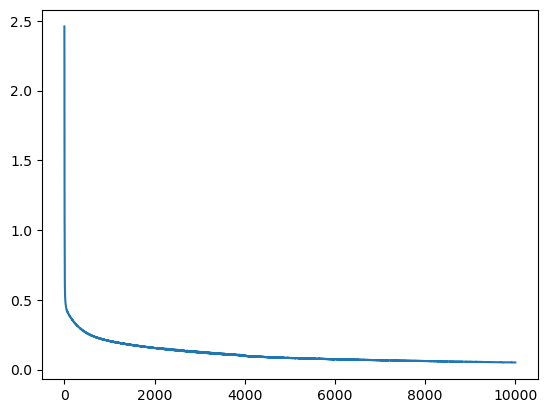

In [117]:
model = MLP()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
model.train()
epoch = 10000
loss_all = []
for ep in range(epoch):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_train)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train_one_hot)
    loss_all.append(loss.item())
#     if epoch % 1000 == 0:
#         print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer.step()


plt.plot(loss_all)
plt.show()

In [118]:
model.eval()
y_pred = model(x_train)
print(y_pred)
y_pred = y_pred.detach().numpy()

y_pred_one_hot = np.zeros(y_pred.shape)  # our zeros and ones will go here
y_pred_one_hot[np.arange(y_pred.shape[0]), np.argmax(y_pred, axis=1)] = 1
print(y_pred_one_hot)

tensor([[9.6791e-01, 6.3301e-03, 2.5187e-03, 1.5687e-03, 1.4736e-04, 8.7065e-07],
        [2.1071e-02, 6.7657e-01, 3.9597e-01, 1.9469e-06, 2.1849e-03, 8.3578e-06],
        [6.1180e-03, 2.2019e-01, 5.8253e-01, 2.4659e-06, 1.1550e-02, 1.6324e-05],
        [6.5427e-03, 2.6089e-13, 4.1572e-06, 9.9495e-01, 6.7524e-03, 3.6018e-03],
        [1.4363e-04, 9.1301e-08, 3.1686e-02, 1.4130e-04, 9.8049e-01, 1.0324e-03],
        [6.6320e-06, 2.0755e-11, 1.5050e-04, 6.2442e-03, 3.0751e-03, 9.9471e-01]],
       grad_fn=<SigmoidBackward>)
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [ ]:
while(True):
    sub = input("Pick a substance from below.\n 1. Methane\n 2. n-Butane\n 3. Propane\n 4. CO2\n 5. CO\n 6. SF6\n\n")
    print("The signature of", y[int(sub)-1], "is")
    print(x[int(sub)-1, :])
    
    time.sleep(2)
    
    print("feeding to classifier...")
    y_pred = model(x_train[int(sub)-1:int(sub), :])
    y_pred = y_pred.detach().numpy()
    sub_ind = np.argmax(y_pred, axis=1)
    
    time.sleep(2)
    
    print("The substance is", y[sub_ind], '\n\n')
    
    time.sleep(3)

Pick a substance from below.
 1. Methane
 2. n-Butane
 3. Propane
 4. CO2
 5. CO
 6. SF6

3
The signature of Propane is
[ 11.7  48.6 106.  156.  182.  226.  245.  244.  241.  234.  221.  210.
 199.  188.  175.  162. ]
feeding to classifier...
The substance is ['Propane'] 


Pick a substance from below.
 1. Methane
 2. n-Butane
 3. Propane
 4. CO2
 5. CO
 6. SF6

1
The signature of Methane is
[ 14.6  57.8 123.  185.  219.  240.  275.  283.  278.  268.  254.  239.
 222.  206.  190.  174. ]
feeding to classifier...
The substance is ['Methane'] 


Pick a substance from below.
 1. Methane
 2. n-Butane
 3. Propane
 4. CO2
 5. CO
 6. SF6

6
The signature of SF6 is
[ 14.6  59.1 126.  191.  241.  271.  280.  267.  255.  256.  245.  228.
 204.  172.  137.  101. ]
feeding to classifier...
The substance is ['SF6'] 


